In [4]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy
import pandas as pd

# Implementation of Hierarchial Clustering in python

In [43]:
class Hierarchial_Clustering:
    def __init__(self,data=None):
        self.data = data
    
    def linkages(self,X,linkage_type='single'): # Perform hierarchical/agglomerative clustering.
        # scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)
        linkage_matrix = scipy.cluster.hierarchy.linkage(X,method=linkage_type)
        return linkage_matrix
    
    def dendrogram(self,Z,labels=None,title=None): # Plot the hierarchical clustering as a dendrogram. These are data structures and routines for representing hierarchies as tree object
        plt.figure(figsize=(20, 20))
        dendrogram = scipy.cluster.hierarchy.dendrogram(Z,labels = labels,orientation='left')
        if title==None:
            title = f'Hierarchial Clustering'
        plt.title(title)
        plt.ylabel('Data Points')
        plt.xlabel('Distance')
        plt.show()


# Hierarchial Clustering of Customers Data

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


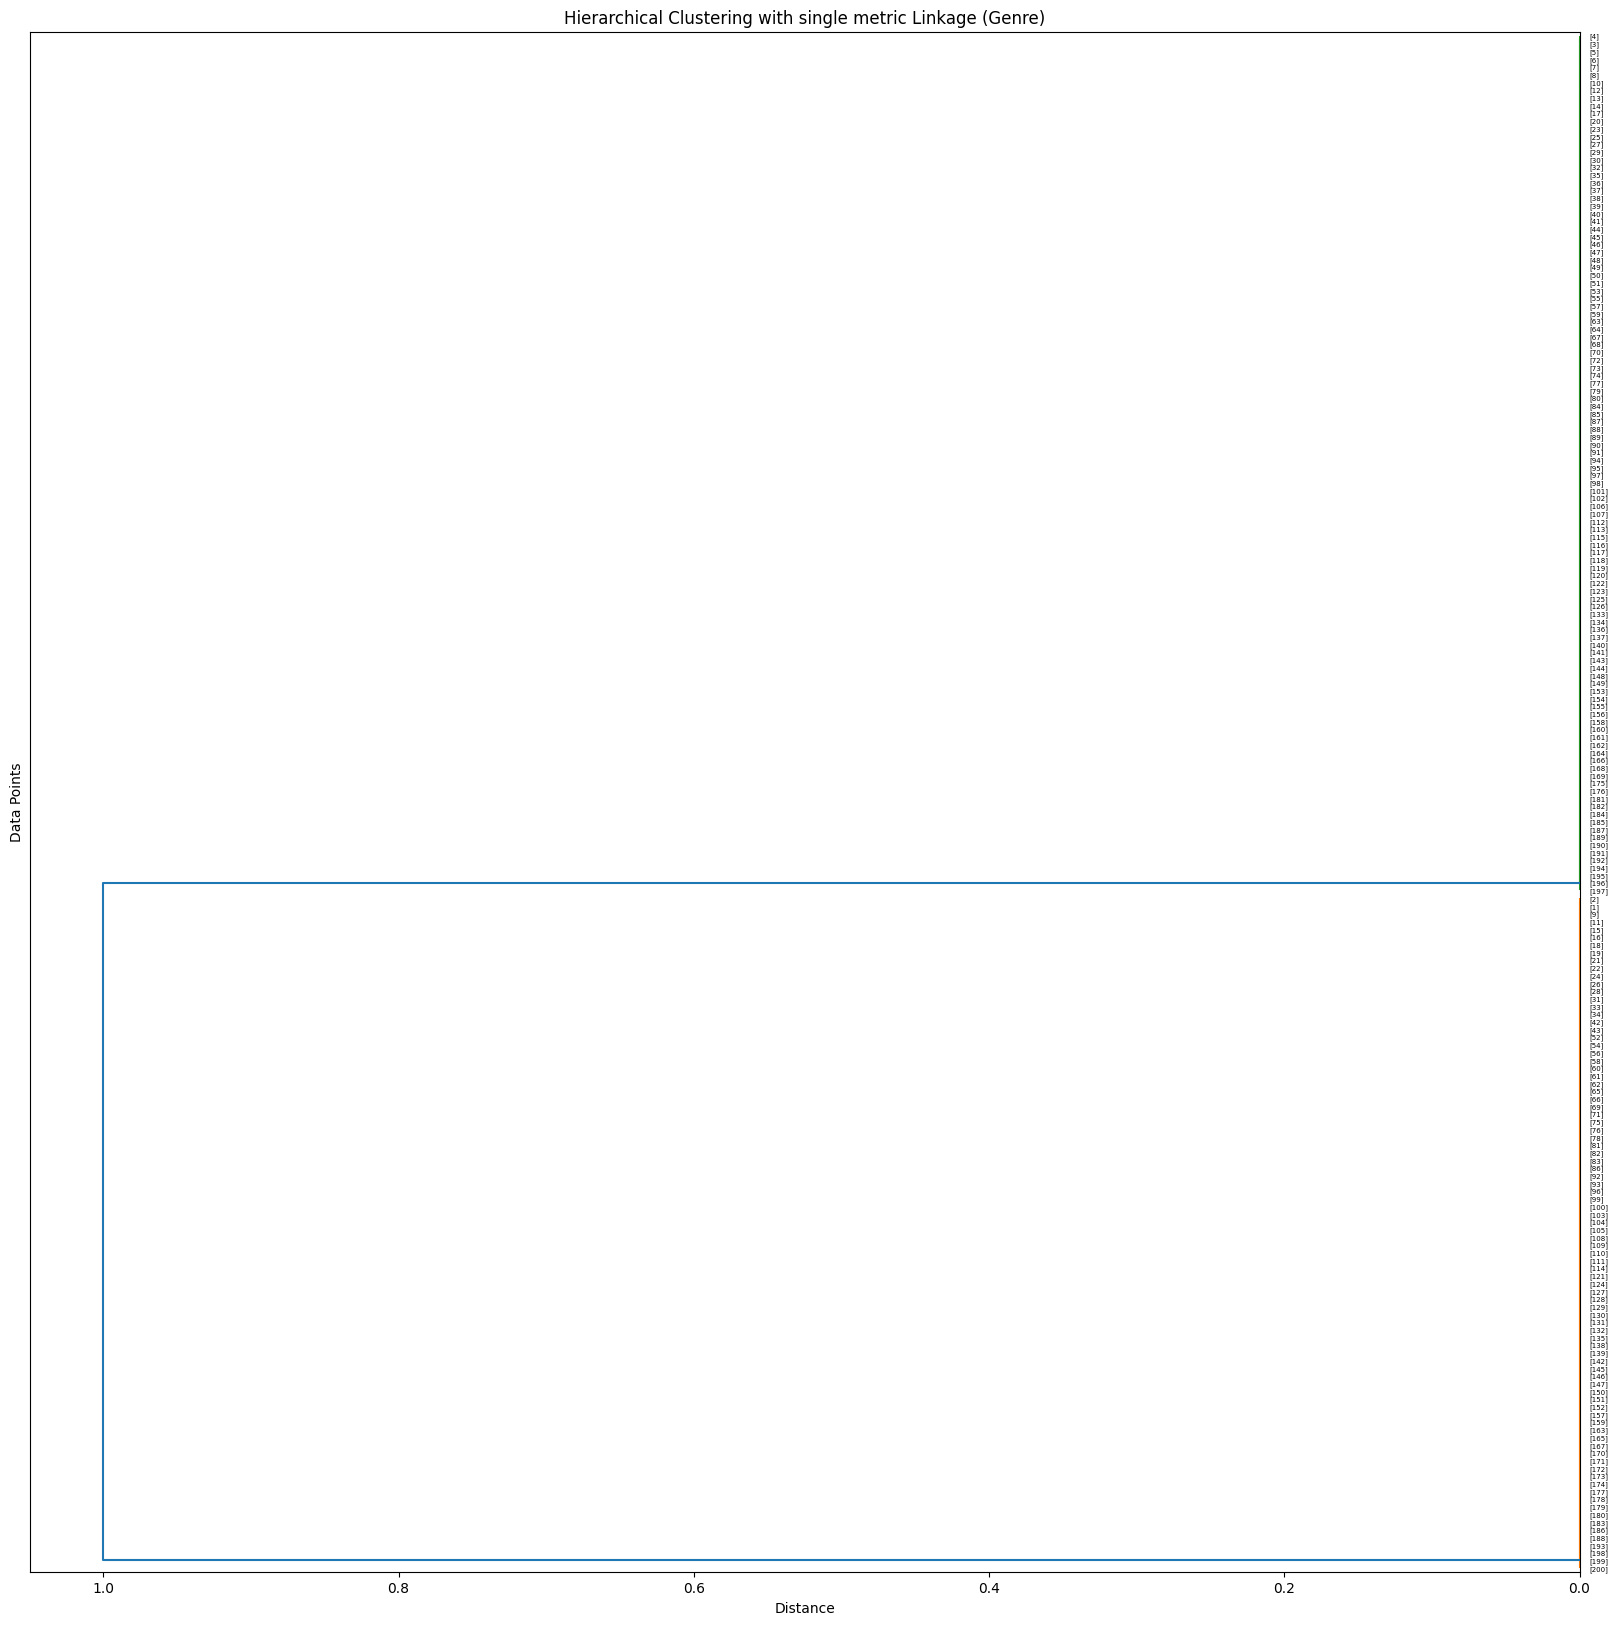

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


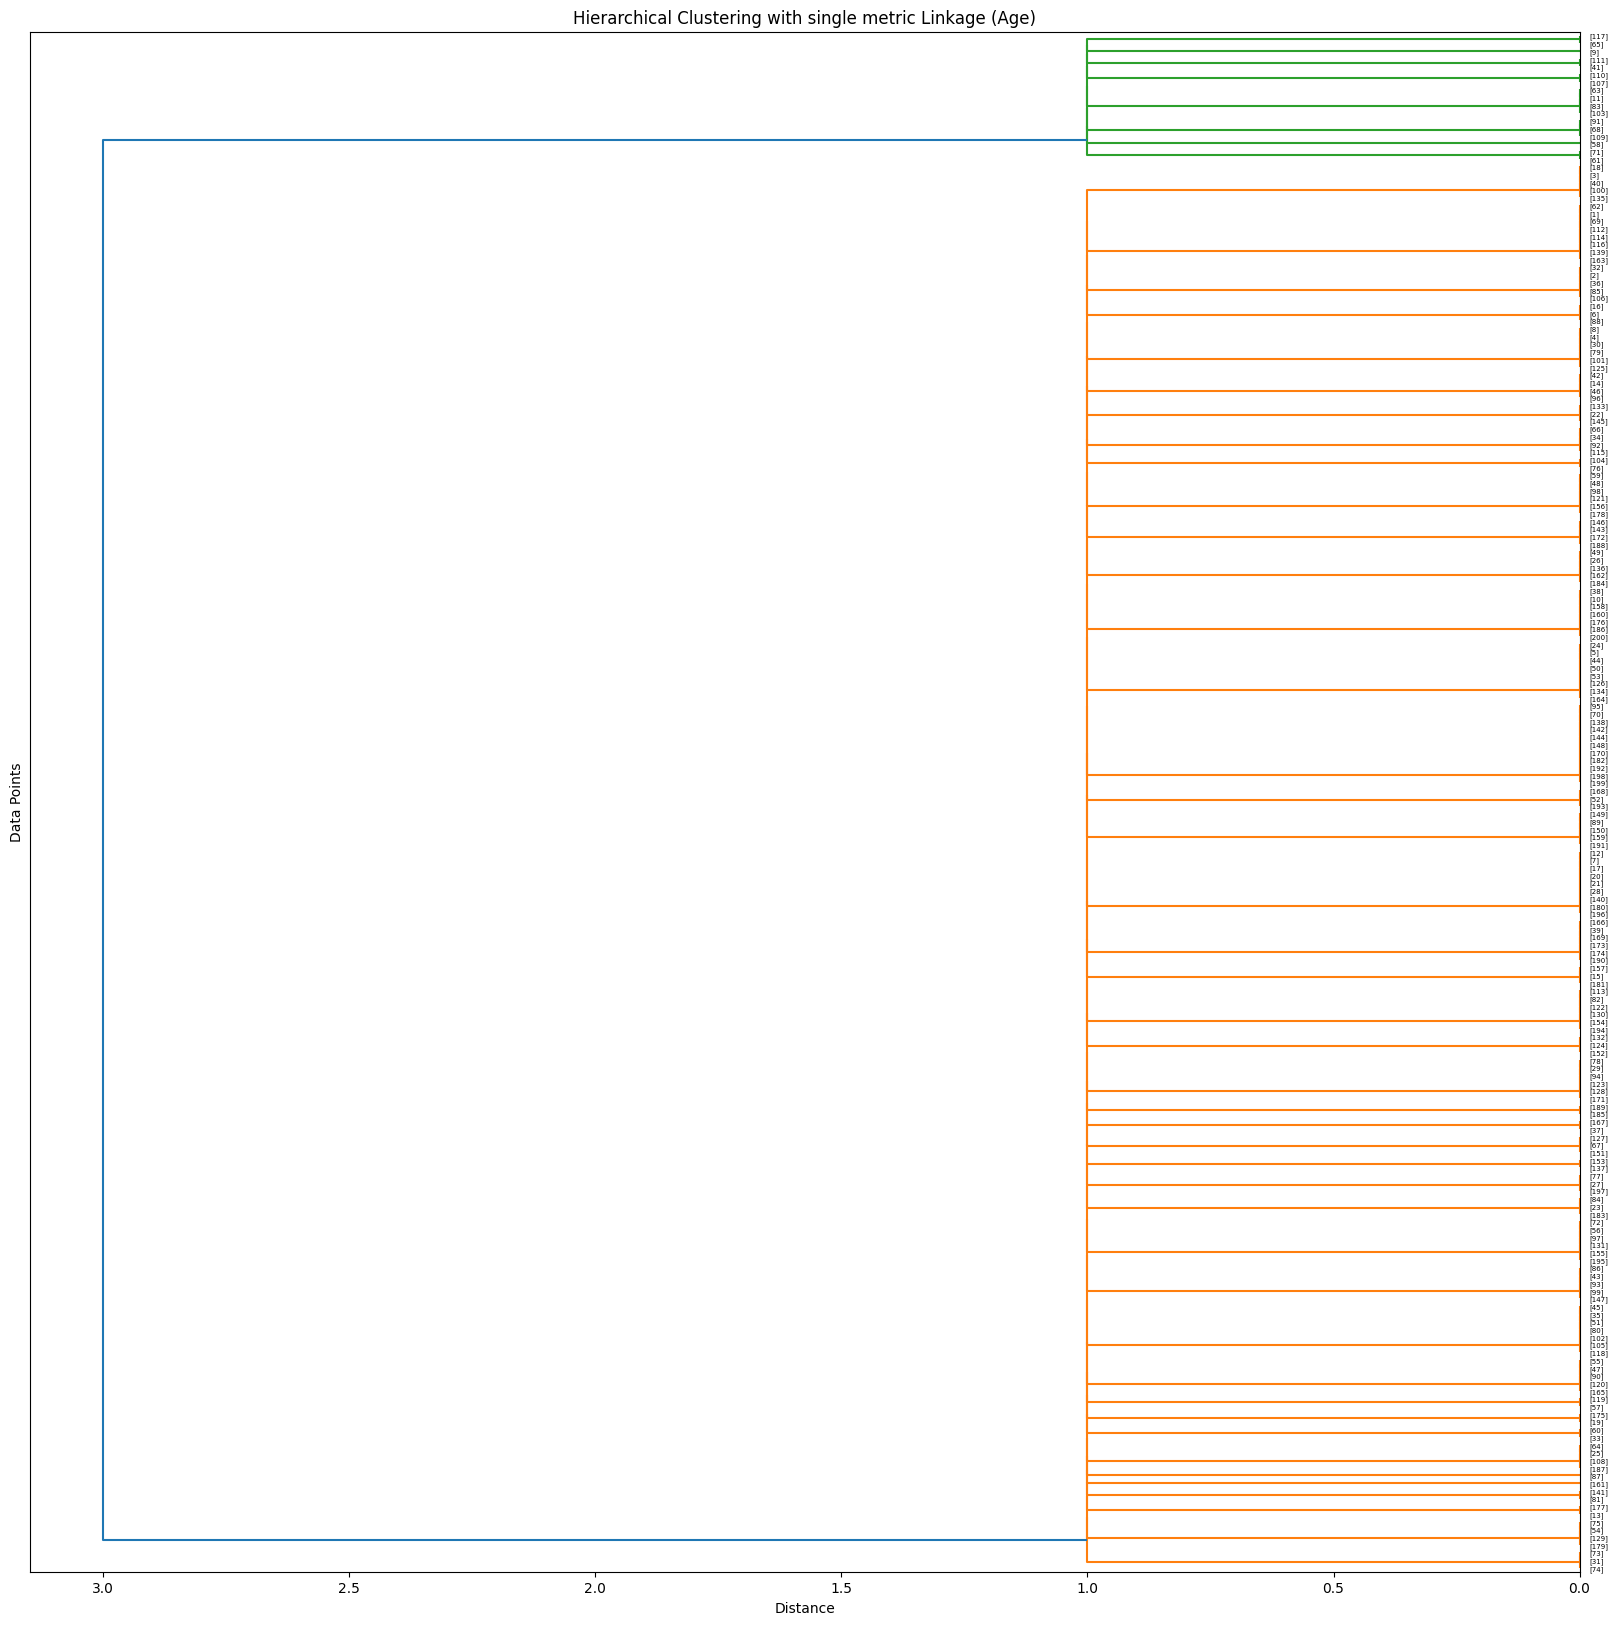

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


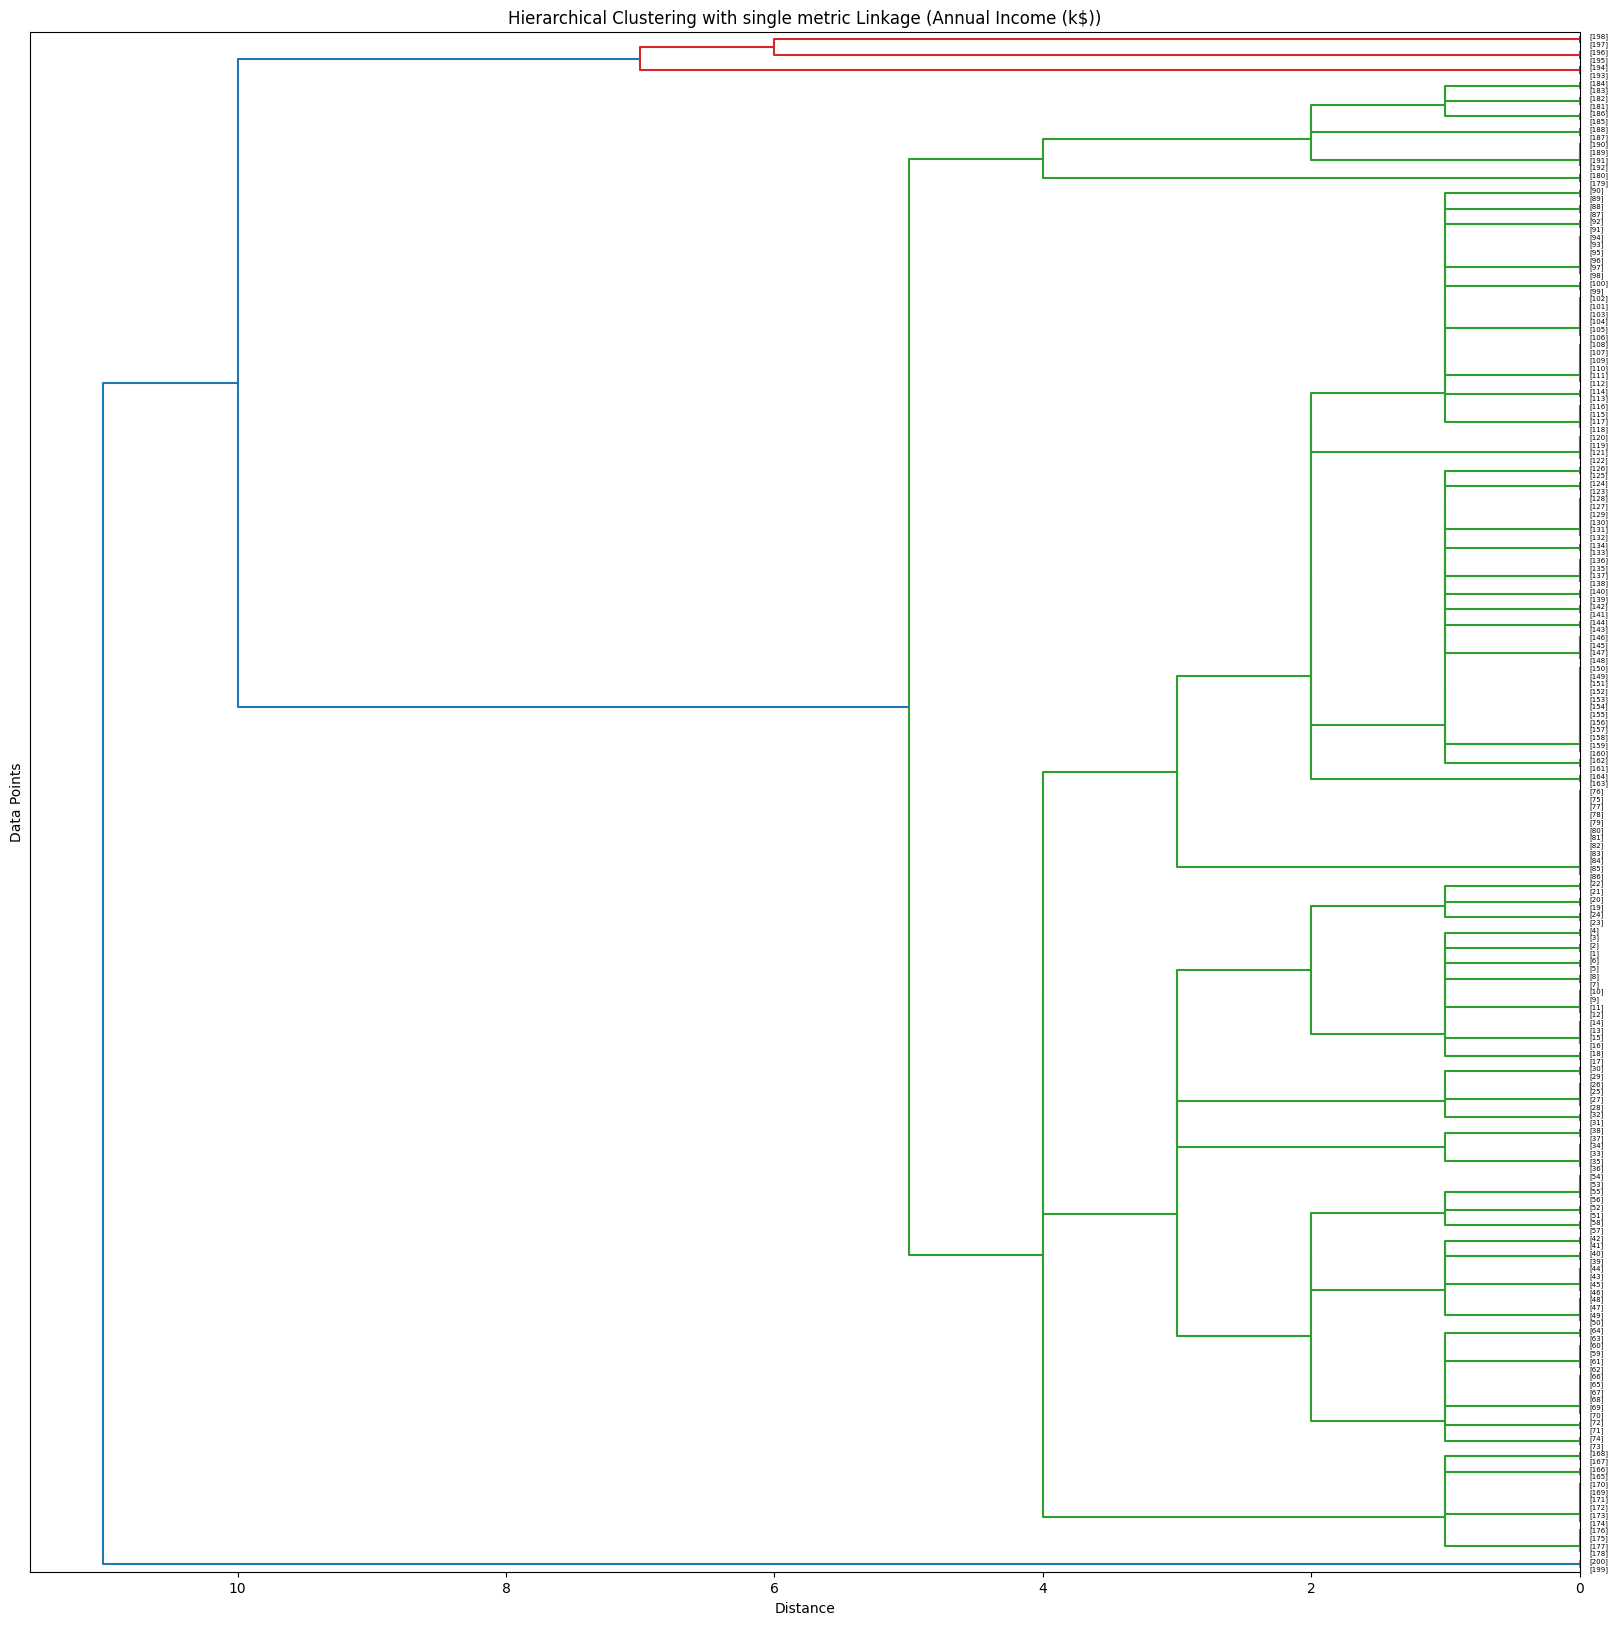

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


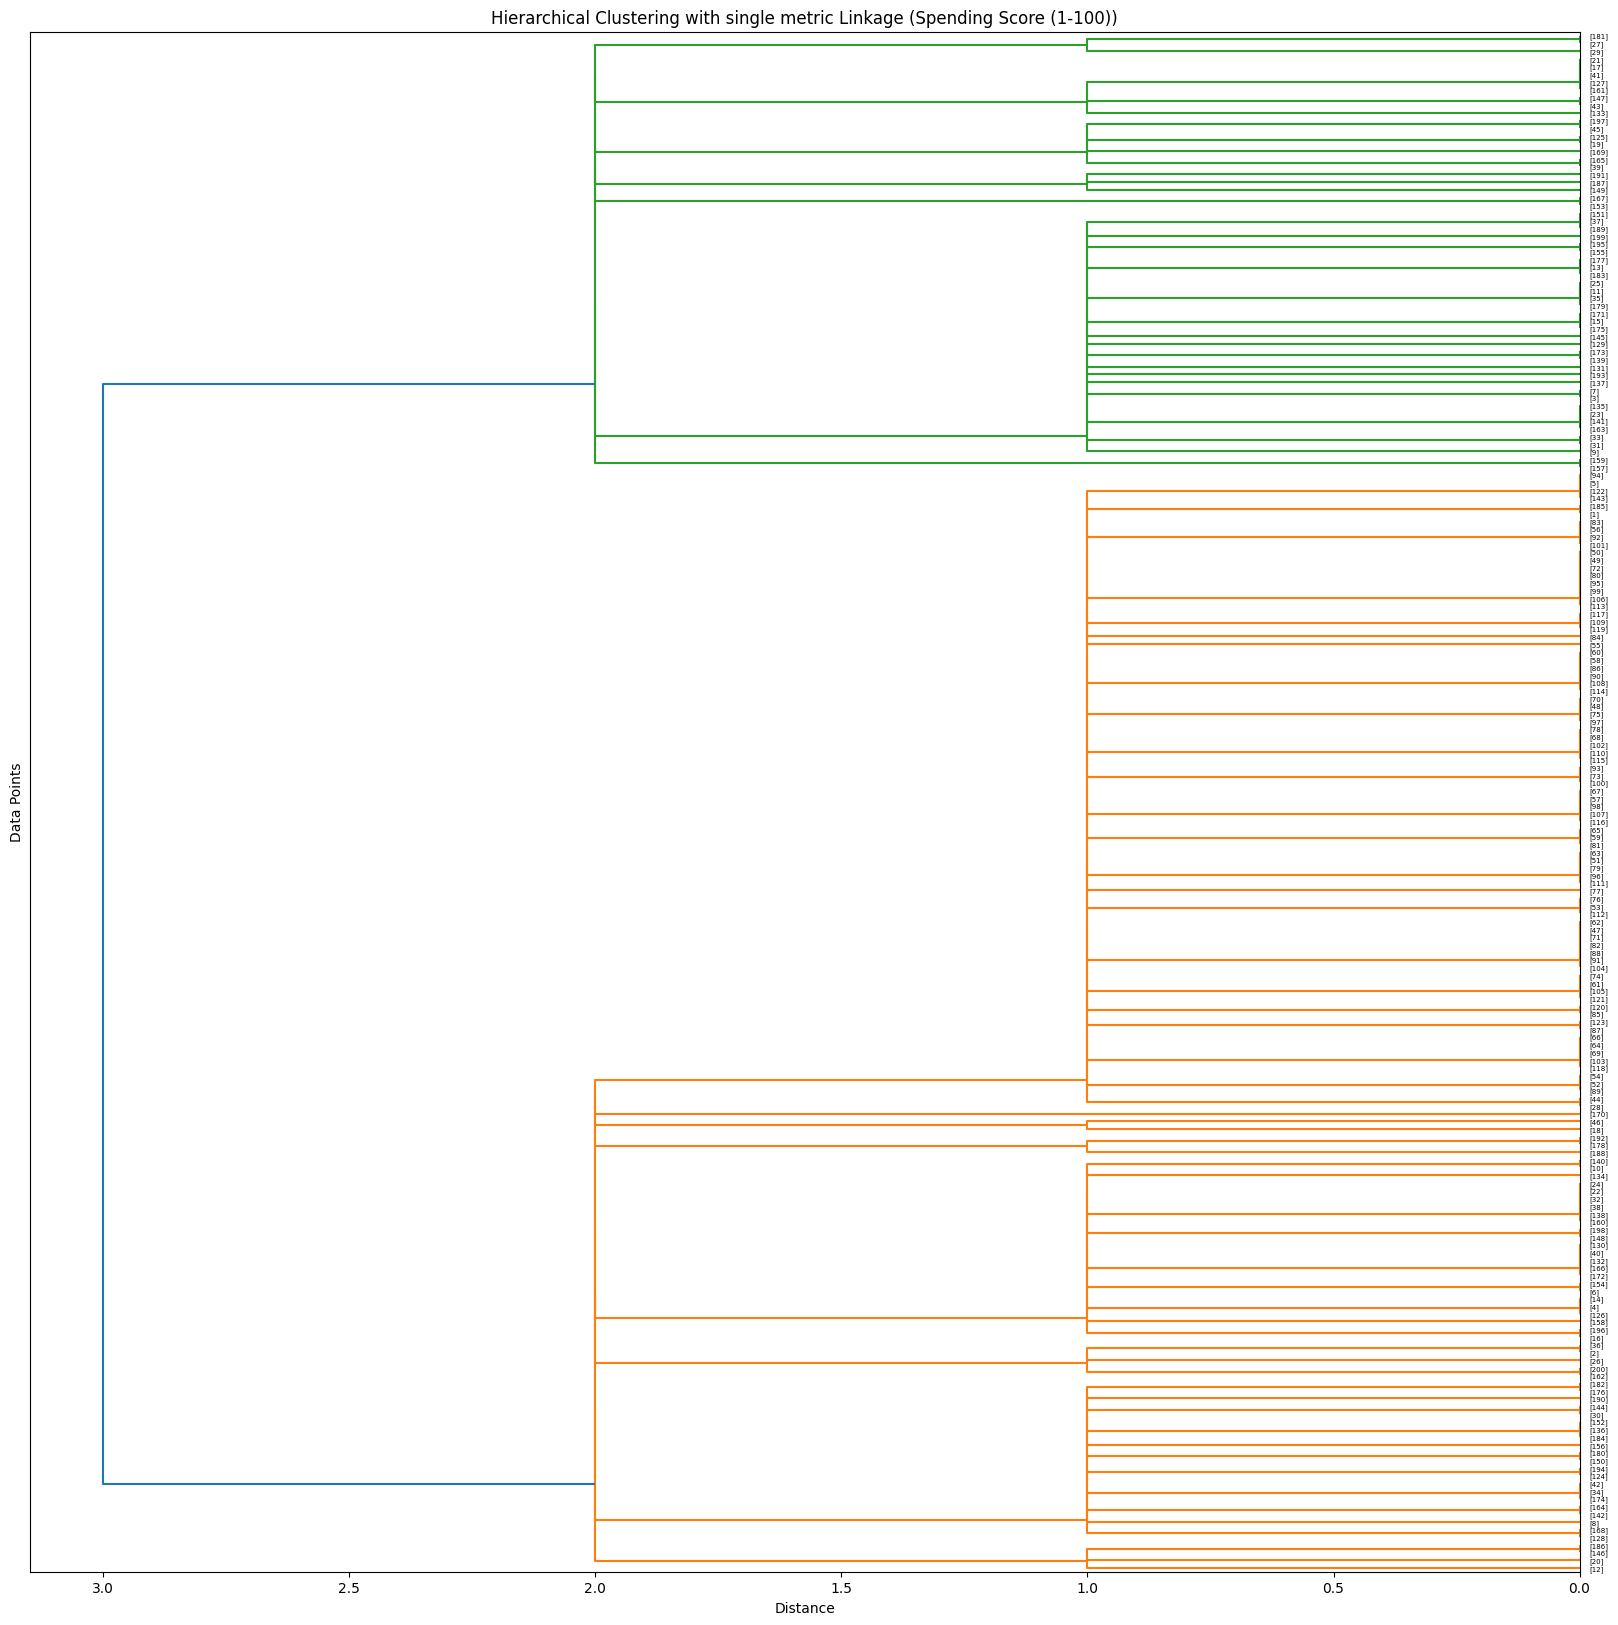

In [44]:
customer_data = pd.read_csv('new_customers.csv') # reading data 200 rows x 5 columns
# display(customer_data)
customer_data['Genre'] = np.where(customer_data['Genre'] == 'Male', 0, 1)
# customer_data = np.array(customer_data)
# print(customer_data[['Annual Income (k$)']].values)
# display(customer_data)
# linkage_metrics = ['single','complete','average','weighted','centroid','median','ward']
linkage_metrics = ['single']
# feature_combinations = [['Genre'],['Age'],['Annual Income (k$)'],['Spending Score (1-100)'],['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]
feature_combinations = [['Genre'],['Age'],['Annual Income (k$)'],['Spending Score (1-100)']]
HC = Hierarchial_Clustering()
for features in feature_combinations:
    for linkage_metric in linkage_metrics:
        linkage_matrix = HC.linkages(customer_data[features].values)
        feature_str = ', '.join(features)
        title = f"Hierarchical Clustering with {linkage_metric} metric Linkage ({feature_str})"
        HC.dendrogram(linkage_matrix,customer_data[['CustomerID']].values,title)